In [245]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

In [246]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\Dhruv Saxena\Desktop\Dhruv\GenerativeAI\LangGraph\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [247]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name= "Gemma2-9b-It")

## Predefined Tools

In [248]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [249]:
api_wrapper = WikipediaAPIWrapper()
tool = WikipediaQueryRun(api_wrapper= api_wrapper) 
print(tool.run({"query": "langchain"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.

Page: Retrieval-augmented generation
Summary: Retrieval augmented generation (RAG) is a type of generative artificial intelligence that has information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information in preference to information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data, or giving factual information only from an authoritative source.



Page: Prompt injecti

In [250]:
from langchain_community.tools import YouTubeSearchTool

In [251]:
tool=YouTubeSearchTool()
tool.run("carry minati")

"['https://www.youtube.com/watch?v=WX7DBPcsiEs&pp=ygUMY2FycnkgbWluYXRp', 'https://www.youtube.com/watch?v=i2xxhRTs5Uc&pp=ygUMY2FycnkgbWluYXRp']"

In [252]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [253]:
tool = TavilySearchResults()
tool.invoke({"query": "What happened in the latest burning man floods"})

[{'url': 'https://www.npr.org/2023/09/03/1197497458/the-latest-on-the-burning-man-flooding',
  'content': "There are also reports that at least one person has died at the counterculture festival about a hundred miles north of Reno, Nev. Earlier this afternoon, I caught up with NPR's Claudia Peschiutta, who's at her first burn, and she told me it's muddy where she is, but that she and her camp family have been making the best of things.\n National\nThe latest on the Burning Man flooding\nClaudia Peschiutta\nAuthorities are investigating a death at the Burning Man festival in the Nevada desert after tens of thousands of people are stuck in camps because of rain.\n SCOTT DETROW, HOST:\nKnee-deep mud, warnings to conserve food and water, orders to shelter in place - this is all at Burning Man 2023 after torrential rains turned the Black Rock Desert into miles and miles of mud. I mean, mostly what I've seen from my personal experience is just any sort of need that you have, somebody, whethe

## Create a Custom tool

In [254]:
from langchain.agents import tool

In [255]:
@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)

In [256]:
get_word_length.invoke("Dhruv Saxena")

12

In [257]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [258]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [259]:
multiply.invoke({"a":10,"b":20})

200

# Concept of Agents
- This agent class from the first version of Langchain (legacy).

In [260]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent 

In [261]:
tool = load_tools(["wikipedia"], llm= llm) 

In [262]:
agent = initialize_agent(tool, llm, agent= AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose= True)

C:\Users\Dhruv Saxena\AppData\Local\Temp\ipykernel_24660\4150970084.py:1: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  agent = initialize_agent(tool, llm, agent= AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose= True)


In [263]:
agent.run("What is current GDP of India??")



> Entering new AgentExecutor chain...


C:\Users\Dhruv Saxena\AppData\Local\Temp\ipykernel_24660\4031984684.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("What is current GDP of India??")


Thought: I need to search Wikipedia for the current GDP of India.
Action: wikipedia
Action Input: GDP of India
Observation: Page: Economy of India
Summary: The economy of India is a developing mixed economy with a notable public sector in strategic sectors. It is the world's fifth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 125th by GDP (PPP). From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj. The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning. Since the start of the 21st centu

"India's nominal GDP is the fifth largest in the world."

## Let's Understand the working of Agents
#### Showcase the image and Explain the basic flow of Agent

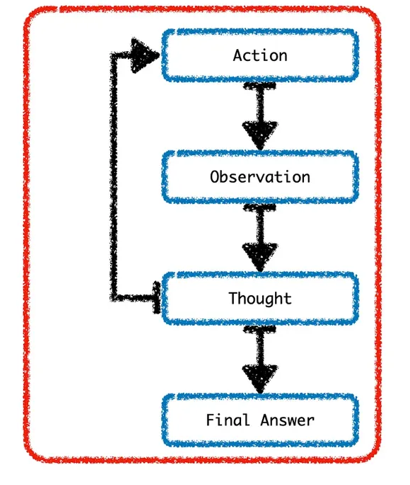

#### Now Built the Agent from the LangChain Version itself but this time we will use the Predefine Classes for the different type of Agents

In [264]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [265]:
search = TavilySearchResults()

In [266]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1728236017, 'localtime': '2024-10-06 10:33'}, 'current': {'last_updated_epoch': 1728235800, 'last_updated': '2024-10-06 10:30', 'temp_c': 22.8, 'temp_f': 73.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 5.4, 'wind_kph': 8.6, 'wind_degree': 33, 'wind_dir': 'NNE', 'pressure_mb': 1015.0, 'pressure_in': 29.98, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 66, 'cloud': 50, 'feelslike_c': 24.7, 'feelslike_f': 76.4, 'windchill_c': 22.3, 'windchill_f': 72.1, 'heatindex_c': 23.5, 'heatindex_f': 74.4, 'dewpoint_c': 10.3, 'dewpoint_f': 50.5, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 6.0, 'gust_mph': 11.3, 'gust_kph': 18.1}}"},
 {'url': 'https://www.wunderground.com/hou

In [267]:
tools = [search]

##### We have different type of Agents

In [268]:
from langchain import hub

In [269]:
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")

In [270]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [271]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

**agent_scratchpad:** The agent does not call a tool just once to get the desired answer, but has a structure that calls tools repeatedly until the desired answer is obtained. Each time you call a tool, what the previous call was like, information about the previous call, and the result are stored in this field.

In [272]:
from langchain.agents import create_tool_calling_agent
agent = create_tool_calling_agent(llm, tools, prompt)

####  Here explain about the AgentExecutor class

In [273]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [274]:
agent_executor.invoke({"input": "hello how are you?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'how are you'}`


[{'url': 'https://www.eslbuzz.com/how-are-you/', 'content': 'Here are some funny ways to say "how are you" in English: " What\'s shaking, bacon?". - This is a playful and informal way of asking "how are you.". It is often used jokingly or among friends and the word "bacon" is used as a friendly term of address. " How\'s your head, (fuzzy, clear, etc)?".'}, {'url': 'https://7esl.com/how-are-you/', 'content': '7ESL » Expressions » Phrases » 40 Other Ways to Ask “How Are You” in English\n40 Other Ways to Ask “How Are You” in English\nThe way that you ask someone “how are you?” may vary depending on who is being asked and in what setting the conversation is taking place. Related links:\n21 thoughts on “40 Other Ways to Ask “How Are You” in English”\nComment navigation\nWhat’s new\nI like lessons\nThank you\nGood\nTHANKS ALOT! How’s it rolling?\nComment navigation\nLeave a Comme

{'input': 'hello how are you?',
 'output': "I'm doing well, thank you! How are you?"}

In [275]:
agent_executor.invoke({"input": "whats the weather in sf?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in san francisco'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1728236017, 'localtime': '2024-10-06 10:33'}, 'current': {'last_updated_epoch': 1728235800, 'last_updated': '2024-10-06 10:30', 'temp_c': 22.8, 'temp_f': 73.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 5.4, 'wind_kph': 8.6, 'wind_degree': 33, 'wind_dir': 'NNE', 'pressure_mb': 1015.0, 'pressure_in': 29.98, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 66, 'cloud': 50, 'feelslike_c': 24.7, 'feelslike_f': 76.4, 'windchill_c': 22.3, 'windchill_f': 72.1, 'heatindex_c': 23.5, 'heatindex_f': 74.4, 'dewpoint_c': 10.3, 'dewpoint_f': 50.5, 'v

{'input': 'whats the weather in sf?',
 'output': 'The current temperature in San Francisco is 73 degrees Fahrenheit. \n'}

# Let's add one more tool over here

In [276]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [277]:
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

In [278]:
docs

[Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='\n\n\n\n\nGet started with LangSmith | 🦜️🛠️ LangSmith\n\n\n\n\n\n\n\nSkip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith\u200bPythonTypeScriptpip install -U langsmithya

In [279]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)

In [280]:
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [281]:
retriever.invoke("how to upload a dataset")[0]

Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='description="A sample dataset in LangSmith.")client.create_examples(    inputs=[        {"postfix": "to LangSmith"},        {"postfix": "to Evaluations in LangSmith"},    ],    outputs=[        {"output": "Welcome to LangSmith"},        {"output": "Welcome to Evaluations in LangSmith"},    ],    dataset_id=dataset.id,)# Define your evaluatordef exact_match(run, example):    return {"score": run.outputs["output"] == example.outputs["output"]}experiment_results = evaluate(    lambda input: "Welcome " + input[\'postfix\'], # Your AI system goes here    data=dataset_name,

In [282]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "langGraph_studio",
    "Search for information about Langgraph. for any question about langGraph, you must use this tool!!"
)

In [283]:
tools = [search, retriever_tool]

In [284]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [285]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent= agent, tools = tools, verbose= True)

In [286]:
agent_executor.invoke({"input": "Hii!! what is a langgraph studio and how to use it?"})



> Entering new AgentExecutor chain...

Invoking: `langGraph_studio` with `{'query': 'how to use it'}`


Get started with LangSmith | 🦜️🛠️ LangSmith

how to use traceable. See more on the Annotate code for tracing page.PythonTypeScriptimport openaifrom langsmith.wrappers import wrap_openaifrom langsmith import traceable# Auto-trace LLM calls in-contextclient = wrap_openai(openai.Client())@traceable # Auto-trace this functiondef pipeline(user_input: str):    result = client.chat.completions.create(        messages=[{"role": "user", "content": user_input}],        model="gpt-3.5-turbo"    )    return result.choices[0].message.contentpipeline("Hello, world!")# Out:  Hello there! How can I assist you today?import { OpenAI } from "openai";import { traceable } from "langsmith/traceable";import { wrapOpenAI } from "langsmith/wrappers";// Auto-trace LLM calls in-contextconst client = wrapOpenAI(new OpenAI());// Auto-trace this functionconst pipeline = traceable(async (user_input) => {    cons

{'input': 'Hii!! what is a langgraph studio and how to use it?',
 'output': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence.  LangSmith works on its own! You can find more information on how to use LangSmith here: https://langchain.com/docs/get-started/langsmith  '}

In [287]:
agent_executor.invoke({"input": "Hii!! can you tell me about open ai?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'openai'}`


[{'url': 'https://openai.com/about/', 'content': 'OpenAI is an AI research and deployment company. Our mission is to ensure that artificial general intelligence benefits all of humanity. Our vision for the future of AGI. Our mission is to ensure that artificial general intelligence—AI systems that are generally smarter than humans—benefits all of humanity.'}, {'url': 'https://openai.com/api/', 'content': 'Introducing OpenAI o1-preview and OpenAI o1-mini, our new models with reasoning capabilities. Learn more (opens in a new window) Access the power of our models with APIs'}, {'url': 'https://platform.openai.com/login?launch', 'content': "Explore resources, tutorials, API docs, and dynamic examples to get the most out of OpenAI's developer platform."}, {'url': 'https://openai.com/index/gpt-4-research/', 'content': "We've created GPT-4, the latest milestone in OpenAI's effort in s

{'input': 'Hii!! can you tell me about open ai?',
 'output': 'OpenAI is an AI research and deployment company. Their mission is to ensure that artificial general intelligence benefits all of humanity.  \n'}

# ReAct Agent (Reasoning + Acting)

#### Definition:
- The ReAct framework combines reasoning and acting in a single loop to handle task. The agent uses natural language reasoning (thinking through steps) and task actions, (performing tasks like calculation or data retrieval).
- The agent uses a combination of reasoning steps to guide actions in real-time, using feedback from those actions to further inform the next step in reasoning.

#### How it works:
- **Step 1**: The agent recieves a question or task.
- **Step 2**: It reasons aloud (in natural language) about how to solve it.
- **Step 3**: Based on its reasoning, it takes action (e.g., searching a database, calculating something).
- **Step 4**: The result of these actions are integrated into its resoning and may triggers further action.
- **Step 5**: It repeats the process until it arrives at a solution.

#### Key points:

- Combines thinking and doing (reasoning and actions).
- Performs iterative steps, updating its process based on action results.
- Typically handles complex decision-making scenarios.

#### Example:

- Original task: "Calculate the total number of apples in a basket if there are 4 baskets and 7 apples in each."
- Reasoning: "I need to multiply 4 by 7 to get the total number of apples."
- Action: Perform the multiplication.
- Result: "There are 28 apples."
- Reasoning: "I am done."



In [310]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import Tool
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor, create_react_agent

In [368]:
from dotenv import load_dotenv
load_dotenv()

True

In [370]:
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

In [329]:
google_search = GoogleSerperAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=google_search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [345]:
search = TavilySearchResults()
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [346]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [347]:
prompt = PromptTemplate.from_template(template)

In [348]:
search_agent = create_react_agent(llm,tools,prompt)

In [349]:
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

In [350]:
response = agent_executor.invoke({"input": "Where is the hometown of the 2007 T20 Cricket World Cup winner captain and his score?"})
print(response)



> Entering new AgentExecutor chain...
Thought: I need to find out who captained the 2007 T20 Cricket World Cup winning team.
Action: tavily_search_results_json
Action Input: 2007 T20 Cricket World Cup winning captain [{'url': 'https://uccricket.live/cricket/t20-world-cup/winner-captain-list-2007-to-2024-2583/', 'content': 'Sep 10, 2024 · T20 Cricket World Cup Winners Captains List ; Mahendra Singh Dhoni, 1, India, 2007 ; Younis Khan, 1, Pakistan, 2009.'}, {'url': 'https://khelnow.com/cricket/list-of-captains-to-win-icc-t20-world-cup', 'content': "Jun 28, 2024 · Darren Sammy is the only captain to win the men's ICC T20 World Cup twice. · 1. 2007 T20 World Cup – MS Dhoni (India) · 2. 2009 T20 World Cup –\xa0..."}, {'url': 'https://timesofindia.indiatimes.com/sports/cricket/icc-mens-t20-world-cup/icc-t20-world-cup-winners-list-with-captains/articleshow/111453056.cms', 'content': 'Jul 5, 2024 · ICC T20 World Cup winners list with captains from 2007 to 2024 ... Rohit Sharma led India to v

In [351]:
response = agent_executor.invoke({"input": "Who is the god of cricket what is highest score of the god?"})
print(response)



> Entering new AgentExecutor chain...
Question: Who is the god of cricket what is highest score of the god?
Thought: This is a bit of a trick question. Cricket doesn't have a literal god. 
Action: tavily_search_results_json
Action Input:  Who is considered the greatest cricketer of all time?[{'url': 'https://www.quora.com/Who-is-the-greatest-cricket-player-of-all-time', 'content': 'Dec 5, 2015 · Sachin Tendulkar is widely regarded as one of the greatest cricket players of all time due to no. of reasons. 1.) As the number show, he is the highest run-\xa0...Can you rank the top 10 greatest players of all time in cricket history?Who is the greatest batsman ever (cricket)? Why? What makes him ...Was Garfield Sobers the greatest cricketer of all time? - QuoraWhy Sachin Tendulkar is the best batsman in the world? - QuoraMore results from www.quora.com'}, {'url': 'https://www.bbc.co.uk/programmes/articles/2V6BjFgdJ5KcfVHhR3bwBLz/the-greatest-cricketer-of-all-time-your-votes-revealed', 'cont

# ReAct Agent with Custom tools

In [353]:
from langchain.tools import tool
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent

In [356]:
# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

In [357]:
# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

In [358]:
# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react")

In [359]:
tools = [get_employee_salary, get_employee_id]

In [360]:
agent = create_react_agent(llm,tools,prompt)

In [361]:
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [362]:
agent_executor.invoke({"input":"What is the Salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: I need to find Evan's employee ID first. 
Action: get_employee_id
Action Input: EvanE005Thought: Now that I have Evan's employee ID, I can find his salary.
Action: get_employee_salary
Action Input: E00545000I now know the final answer 
Final Answer: Evan's salary is 45000. 


> Finished chain.


{'input': 'What is the Salary of Evan?', 'output': "Evan's salary is 45000."}

In [363]:
agent_executor.invoke({"input":"What is the Salary of Dhruv?"})



> Entering new AgentExecutor chain...
Thought: I need to find Dhruv's employee ID first. 
Action: get_employee_id
Action Input: DhruvEmployee not foundQuestion: What is the Salary of Dhruv?
Thought: I need to find Dhruv's employee ID first. 
Action: get_employee_id
Action Input: DhruvEmployee not foundQuestion: What is the Salary of Dhruv?
Thought: I need to find Dhruv's employee ID first. 
Action: get_employee_id
Action Input: DhruvEmployee not foundQuestion: What is the Salary of Dhruv?
Thought: I need to find Dhruv's employee ID first. 
Action: get_employee_id
Action Input: DhruvEmployee not foundQuestion: What is the Salary of Dhruv?
Thought: I need to find Dhruv's employee ID first. 
Action: get_employee_id
Action Input: DhruvEmployee not foundFinal Answer: Employee not found 


> Finished chain.


{'input': 'What is the Salary of Dhruv?', 'output': 'Employee not found'}

## Self-Ask with Search Agent:
#### Definition:
- This approach allows the Al to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
- Once the Al generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.

#### How it works:
- Step 1: Receive a complex question.
- Step 2: The agent identifies sub-questions or follow-up questions.
- Step 3: It performs a search or fetches answers to these questions from external resources (like a web search).
- Step 4: The answers are aggregated to provide a complete response.
#### Key points:
- Emphasizes question decomposition.
- Relies on external search for sub-questions.
- Useful for answering open-ended or broad questions where the answer is not immediately available.

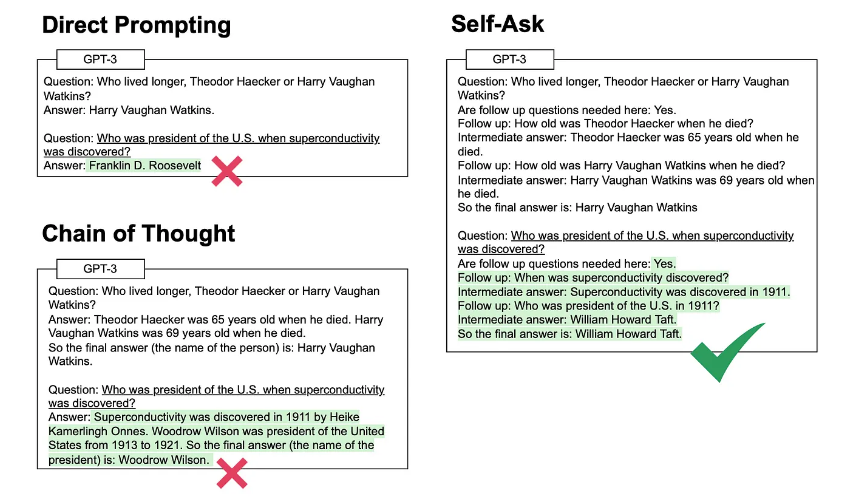

In [365]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model= "models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model= "gemini-1.0-pro")

In [366]:
from langchain import hub
from langchain.agents import AgentExecutor, create_self_ask_with_search_agent

In [373]:
google_search = GoogleSerperAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=google_search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [384]:
search = TavilySearchResults()
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [385]:
## Get the prompt to use - you can modify this!!

prompt = hub.pull("hwchase17/self-ask-with-search")

In [386]:
print(prompt.template)

Question: Who lived longer, Muhammad Ali or Alan Turing?
Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali

Question: When was the founder of craigslist born?
Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952

Question: Who was the maternal grandfather of George Washington?
Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary Ball Washin

In [387]:
## Construct the Self Ask With Search Agent

agent = create_self_ask_with_search_agent(llm, tools, prompt)

In [388]:
## Create an agent excutor by passing in the agent and tools
agent_executor = AgentExecutor(agent= agent, tools= tools, verbose= True, handle_parsing_errors=True)

In [389]:
agent_executor.invoke({"input": "Where is the home town current prime minister of India??"})



> Entering new AgentExecutor chain...
Yes.
Follow up: Who is the current prime minister of India?[{'url': 'https://www.cnn.com/2024/06/04/india/india-election-modi-victory-declaration-intl-hnk/index.html', 'content': "India's transformative yet divisive Prime Minister Narendra Modi declared victory in national elections on Tuesday evening, but his goal of winning an unassailable majority lies in tatters with ..."}, {'url': 'https://www.reuters.com/world/india/indias-modi-sworn-prime-minister-historic-third-term-2024-06-09/', 'content': "Narendra Modi was sworn in as India's prime minister on Sunday for a third term, after a shock election setback that will test his ability to ensure policy certainty in a coalition government in ..."}, {'url': 'https://en.wikipedia.org/wiki/Narendra_Modi', 'content': 'In the campaign, the opposition targeted Modi on allegations of corruption over the Rafale deal with the Government of France, highlighting the controversy surrounding the deal.[227] Mod

{'input': 'Where is the home town current prime minister of India??',
 'output': 'Narendra Modi'}

In [396]:
agent_executor.invoke({"input": "Which Asian country has largest population??"})



> Entering new AgentExecutor chain...
Could not parse output: No.
Final answer: ChinaInvalid or incomplete responseQuestion: How many goals did Mario Lemieux score in 1988?
Are follow up questions needed here: Yes.
Follow up: How many games did Mario Lemieux play in 1988?[{'url': 'https://www.espn.com/nhl/news/story?id=2304706', 'content': 'A chronological look at the career of Mario Lemieux. ... 1988-89 Wins second straight scoring title with 199 points (85, 114). ... Playing in his first game in 44 months, Lemieux has an assist ...'}, {'url': 'https://www.hockeydb.com/ihdb/stats/pdisplay.php?pid=3105', 'content': 'Statistics of Mario Lemieux, a hockey player from Montreal, PQ born Oct 5 1965 who was active from 1981 to 2006. Mario Lemieux. ... 1988-89: NHL: Art Ross Trophy: 1990-91: NHL: Conn Smythe Trophy: 1991-92: NHL: Art Ross Trophy: 1991-92: NHL: ... Did Not Play. Home | Advertise | Feedback ...'}, {'url': 'https://www.statmuse.com/nhl/ask/how-many-games-did-mario-lemieux-have

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


Could not parse output: Could not parse output: Question: What is the name of the largest ocean in the world?
Are follow up questions needed here: No.
Final answer: Pacific Ocean
Invalid or incomplete responseCould not parse output: Question: Which of the following is not a programming language: HTML, CSS, Java, Python?
Are follow up questions needed here: No.
Final answer: HTML and CSS
Invalid or incomplete responseCould not parse output: Could not parse output: Question: What is the name of the largest planet in the solar system?
Are follow up questions needed here: No.
Final answer: Jupiter

Invalid or incomplete responseCould not parse output: Could not parse output: Question: Who directed the movie "The Godfather"?
Are follow up questions needed here: No.
Final answer: Francis Ford Coppola
Invalid or incomplete responseCould not parse output: Could not parse output: Question: What is the most popular social media platform?
Are follow up questions needed here: No.
Final answer: Fac

{'input': 'Which Asian country has largest population??',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [394]:
agent_executor.invoke({"input": "Who is the current caption of indian cricket team?"})



> Entering new AgentExecutor chain...
Yes.
Follow up: What is the name of indian cricket team?[{'url': 'https://simple.wikipedia.org/wiki/India_national_cricket_team', 'content': "India's Mens Cricket Coach in 2023 - Rahul Dravid The Indian Cricket Team is the national cricket team of India.It is ruled by the Board of Control for Cricket in India (BCCI). It is a full member of the International Cricket Council (ICC). It has Test and One Day International (ODI) status. On the other hand the women's cricket team just has Test and One Day International status."}, {'url': 'https://www.bcci.tv/players', 'content': 'View all Indian Cricket Team players and their detailed information with statistics on the official BCCI website. ... Churchgate Mumbai - 400020, India. Email: office@bcci.tv T:+91 22 67598800 T:+91 22 61580300. Matches Domestic International. Videos Latest Highlights Features and Interviews Press Conferences. News'}, {'url': 'https://www.icc-cricket.com/teams/4/india', 'conten

{'input': 'Who is the current caption of indian cricket team?',
 'output': 'Rohit Sharma'}